# Plot $\beta_0$ Curves for SCGs

In this notebook, we plot the $\beta_0$ curves for four structural correlation graphs (SCGs) obtained from two groups - subjects with autism spectrum disorders (ASD) and typically developing control (TDC) subjects. One SCG is constructed for each group.

SCGs are weighted, undirected, complete graphs (there's an edge between every pair of vertices). The vertices of an SCG represent the gray matter regions of interest (ROIs). The weight of an edge between two vertices is given by the magnitude (absolute value) of the correlation between gray matter densities of corresponding ROIs across subjects in the group.

The *Global-SCG* is a whole brain graph comprised of 7266 ROIs (7266 5mm-spheres uniformly distributed over gray matter regions of the brain). *SN-SCG*, *ECN-SCG*, and *DMN-SCG* are graphs comprised of ROIs underlying the *Salience Network* (32 ROIs), *Executive Control Network* (39 ROIs), and *Default Mode Network* (39 ROIs), respectively.

In [1]:
from helper_functions import loadSCGData, getMST, getBettiCurve
import numpy as np
import matplotlib.pyplot as plt

### Computing $\beta_0$ Curves

Given an SCG $G$ and a threshold $\lambda$, we obtain a binary graph $G_{\lambda}$ by removing all edges with weight $<= \lambda$ and assigning all remaining edges to have weight $1$.
The $\beta_0$ number is the number of connected components in $G_{\lambda}$. Note that a component only get disconnected when its heaviest edge (edge with largest weight) is removed from the graph.
To obtain $\beta_0$ curve of $G$, we threshold $G$ at increasing values of $\lambda$ and compute the $\beta_0$ numbers of the thresholded graph. $\beta_0$ curve is simply $\beta_0$ numbers plotted as a function of threshold $\lambda$.


To compute $\beta_0$ curve of $G$, we first construct a graph $H$ on the same vertex set as $G$, where for every edge $e$ with weight $w_e$ in $G$, the corresponding edge in $H$ is assigned weight $1 - w_e$. If we construct a binary graph $H_{\lambda}$ by removing all edges with weight $>= (1 - \lambda)$ and assigning weight $1$ to all remaining edges then $H_{\lambda}$ is identical to $G_{\lambda}$. However, computing $\beta_0$ curves of $H_{\lambda}$ is much simpler.

Note that for $H$, the values of $\lambda$ at which the $\beta_0$ number changes are exactly the weights of edges in the minimum spanning tree of $H$. For any $\lambda$, the corresponding $\beta_0$ number is the number of edges in the minimum spanning tree of $H$ with weights $> (1-\lambda)$. This relation allows us to compute the $\beta_0$ curves efficiently. Many python packages have built-in functions to compute minimum spanning trees.

## Plot $\beta_0$ Curves for Global-SCG

First, let us plot the $\beta_0$ curves for the *Global-SCGs* for the ASD and TDC subjects.<br>
The *Global-SCG* represents *whole-brain* structural connectivity. It has 7266 vertices representing 7266 gray matter ROIs.

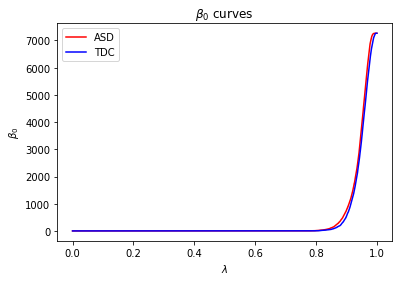

Largest gap =  595 at threshold =  0.9748


In [2]:
icn_asd, icn_tdc = loadSCGData('Global')
mst_asd, mst_tdc = getMST(icn_asd, icn_tdc)
beta_asd, beta_tdc, thresholds = getBettiCurve(mst_asd, mst_tdc)

f = plt.figure(figsize=(6, 4))
plt.plot(thresholds, beta_asd, 'r-', label='ASD')
plt.plot(thresholds, beta_tdc, 'b-', label='TDC')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta_{0}$')
plt.title(r'$\beta_0$ curves')
plt.legend(loc='upper left')
plt.show()

gap = abs(np.asarray(beta_tdc) - np.asarray(beta_asd))
max_idx = np.argmax(gap)
print('Largest gap = ', gap[max_idx], 'at threshold = ', thresholds[max_idx])

## Plot $\beta_0$ Curves for SN-SCG

Next, we plot $\beta_0$ curves of *SN-SCGs* for ASD and TDC subjects.<br>
*SN-SCGs* are made up of 32 gray matter ROIs underlying the *salience network*.

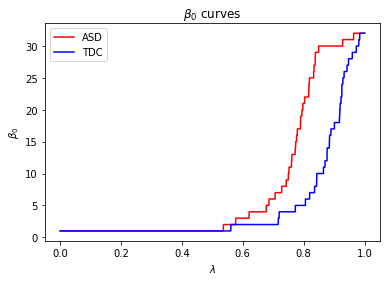

Largest gap =  21 at threshold =  0.8380000000000001


In [3]:
# Load gray matter density data for ROIs underlying specified ICN for ASD and TDC subjects.
icn_asd, icn_tdc = loadSCGData('SN')

# Construct SCGs and compute minimum spanning trees for ASD and TDC.
mst_asd, mst_tdc = getMST(icn_asd, icn_tdc)

# Compute Betti-0 numbers (number of connected components) for a sequence of thresholds for ASD and TDC
beta_asd, beta_tdc, thresholds = getBettiCurve(mst_asd, mst_tdc)

# Plot Betti-0 curves (number of connected components as a function of threshold)
f = plt.figure(figsize=(6, 4))
plt.plot(thresholds, beta_asd, 'r-', label='ASD')
plt.plot(thresholds, beta_tdc, 'b-', label='TDC')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta_{0}$')
plt.title(r'$\beta_0$ curves')
plt.legend(loc='upper left')
plt.show()

# Find the largest gap between Betti-0 curves and the threshold at which it occurs
gap = abs(np.asarray(beta_tdc) - np.asarray(beta_asd))
max_idx = np.argmax(gap)
print('Largest gap = ', gap[max_idx], 'at threshold = ', thresholds[max_idx])

## Plot $\beta_0$ Curves for ECN-SCG

Now, we plot the $\beta_0$ curves of $ECN-SCGs$ for ASD and TDC subjects.<br>
*ECN-SCGs* are made up of 39 gray matter ROIs underlying the *executive control network*.

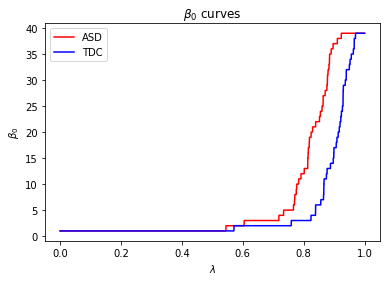

Largest gap =  23 at threshold =  0.8966000000000001


In [4]:
icn_asd, icn_tdc = loadSCGData('ECN')
mst_asd, mst_tdc = getMST(icn_asd, icn_tdc)
beta_asd, beta_tdc, thresholds = getBettiCurve(mst_asd, mst_tdc)

f = plt.figure(figsize=(6, 4))
plt.plot(thresholds, beta_asd, 'r-', label='ASD')
plt.plot(thresholds, beta_tdc, 'b-', label='TDC')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta_{0}$')
plt.title(r'$\beta_0$ curves')
plt.legend(loc='upper left')
plt.show()

gap = abs(np.asarray(beta_tdc) - np.asarray(beta_asd))
max_idx = np.argmax(gap)
print('Largest gap = ', gap[max_idx], 'at threshold = ', thresholds[max_idx])

## Plot $\beta_0$ Curves for DMN-SCG

Lastly, we plot the $\beta_0$ curves of *DMN-SCGs* for ASD and TDC subjects.<br>
*DMN-SCGs* are made up of 39 gray matter ROIs underlying the *default mode network*.

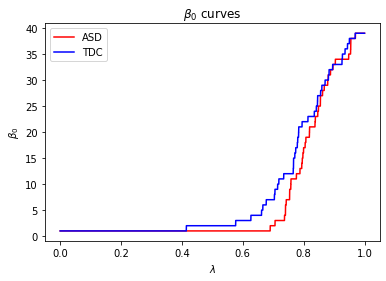

Largest gap =  9 at threshold =  0.7344


In [5]:
icn_asd, icn_tdc = loadSCGData('DMN')
mst_asd, mst_tdc = getMST(icn_asd, icn_tdc)
beta_asd, beta_tdc, thresholds = getBettiCurve(mst_asd, mst_tdc)

f = plt.figure(figsize=(6, 4))
plt.plot(thresholds, beta_asd, 'r-', label='ASD')
plt.plot(thresholds, beta_tdc, 'b-', label='TDC')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta_{0}$')
plt.title(r'$\beta_0$ curves')
plt.legend(loc='upper left')
plt.show()

gap = abs(np.asarray(beta_tdc) - np.asarray(beta_asd))
max_idx = np.argmax(gap)
print('Largest gap = ', gap[max_idx], 'at threshold = ', thresholds[max_idx])